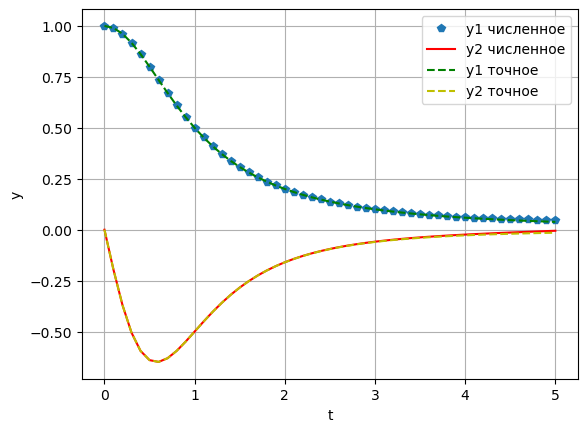

In [7]:
import numpy as np
import matplotlib.pyplot as plt
def f(t, y):
    y1 = y[0]
    y2 = y[1]
    return np.array([y2, -2 * y1**2 * (1 - 4 * t**2 * y1)])

def init(a,b,h):
    t = np.arange(a, b + h, h)
    return t

def rungeKutta(f, t, h, y0):
    N = len(t)
    l = len(y0)
    y = np.zeros((N, l))
    y[0, :] = y0
    for i in range(N - 1):
        k1 = np.array(f(t[i], y[i, :]))
        k2 = np.array(f(t[i] + h / 3, y[i, :] + h / 3 * k1))
        k3 = np.array(f(t[i] + 2 * h / 3, y[i, :] - h / 3 * k1 + h * k2))
        k4 = np.array(f(t[i] + h, y[i, :] + h * k1 - h * k2 + h * k3))
        y[i + 1, :] = y[i, :] + h * (k1 + 3 * k2 + 3 * k3 + k4) / 8
    return y

def Exact(t):
    y1=1/(1+t**2)
    y2=-2*t/(1+t**2)**2
    return np.transpose(np.array([y1, y2]))

a = 0;
b = 5;
h = 0.1;

t = init(a,b,h)

y0 = np.array([1, 0]);

y = rungeKutta(f, t,h, y0);
y_exact = Exact(t)

plt.figure()
plt.plot(t, y[:, 0], 'p', label='y1 численное')
plt.plot(t, y[:, 1], 'r', label='y2 численное')
plt.plot(t, y_exact[:, 0], 'g--', label='y1 точное')
plt.plot(t, y_exact[:, 1], 'y--', label='y2 точное')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)
plt.show()

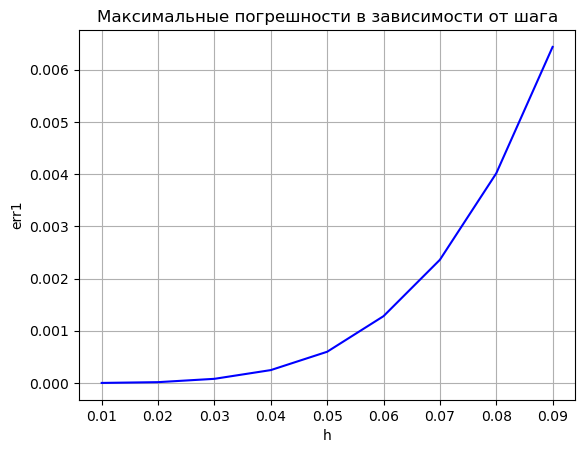

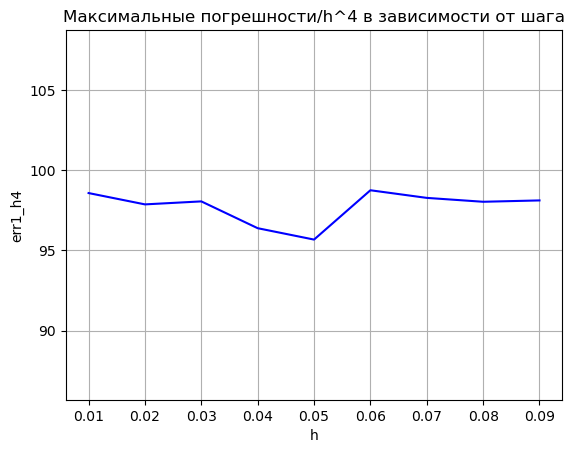

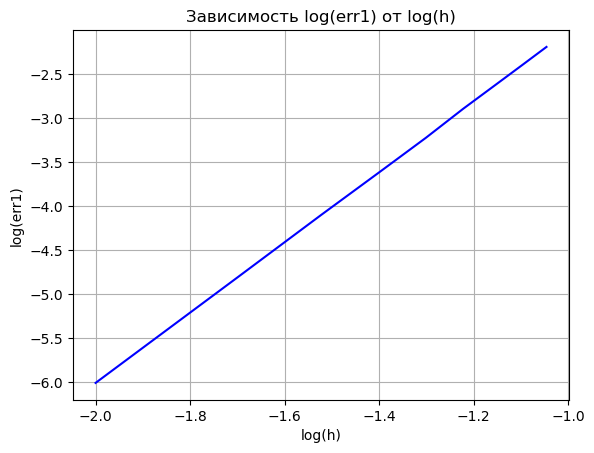

In [16]:
h = np.arange(0.01, 0.1, 0.01)
err1 = np.zeros(len(h))
err1_h4 = np.zeros(len(h))
a=0
b=5
for j in range(len(h)):
    h_cur = h[j]
    t = init(a,b,h_cur)
    y = rungeKutta(f, t, h_cur, y0)
    y_exact = Exact(t)
    err1[j] = np.max(np.abs(y - y_exact))
    err1_h4[j] = err1[j] / (h_cur**4)
err_logged = np.log10(err1)
h_logged = np.log10(h)
plt.figure()
plt.plot(h, err1, 'b')
plt.title('Максимальные погрешности в зависимости от шага')
plt.xlabel('h')
plt.ylabel('err1')
plt.grid(True)

plt.figure()
plt.plot(h, err1_h4, 'b')
plt.title('Максимальные погрешности/h^4 в зависимости от шага')
plt.xlabel('h')
plt.ylim(np.min(err1_h4) - 10, np.max(err1_h4) + 10)
plt.ylabel('err1_h4')
plt.grid(True)
plt.show()

plt.figure()
plt.plot(h_logged, err_logged, 'b')
plt.title('Зависимость log(err1) от log(h)')
plt.xlabel('log(h)')
plt.ylabel('log(err1)')
plt.grid(True)
plt.show()

In [14]:
print(h)
print(err1)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
[9.85828916e-07 1.56601244e-05 7.94308628e-05 2.46755133e-04
 5.97985738e-04 1.27990507e-03 2.35974395e-03 4.01569166e-03
 6.43788284e-03]


In [25]:
print(h_logged)
print(err_logged)

[-2.         -1.69897    -1.52287875 -1.39794001 -1.30103    -1.22184875
 -1.15490196 -1.09691001 -1.04575749]
[-6.00619845 -4.80520479 -4.10001072 -3.6077338  -3.22330917 -2.89282224
 -2.62713512 -2.39623964 -2.19125693]


In [23]:
alpha = np.zeros(len(h) - 1)
for i in range(len(h) - 1):
    alpha[i] = (err_logged[i+1] - err_logged[i]) / (h_logged[i+1] - h_logged[i])
print(h)
print(alpha)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
[3.98961456 4.004708   3.94014642 3.96682054 4.17380314 3.96863126
 3.98150931 4.0072845 ]


In [24]:
print(h)
print(err1_h4)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
[98.58289159 97.87577726 98.06279363 96.388724   95.67771812 98.75810726
 98.28171395 98.03934714 98.12350009]


In [111]:
import math
m = 45
c = 0.25
p = 1.29
s = 0.35
g = 9.81
v0 = 60
def f_task(t, arr):
    x = arr[0]
    y = arr[1]
    v = arr[2]
    teta = arr[3]
    return np.array([v*np.cos(teta), v*np.sin(teta), -c*p*s*v*v/(2*m) - g*np.sin(teta), -g*np.cos(teta)/v])

def rungeKutta_task(f_task, a, b, h, y0):
    t=np.arange(a, b+h, h)
    N = len(t)
    l = len(y0)
    y = np.zeros((N, l))
    y[0, :] = y0
    count = 0
    for i in range(N - 1):
        k1 = np.array(f_task(t[i], y[i, :]))
        k2 = np.array(f_task(t[i] + h / 3, y[i, :] + h / 3 * k1))
        k3 = np.array(f_task(t[i] + 2 * h / 3, y[i, :] - h / 3 * k1 + h * k2))
        k4 = np.array(f_task(t[i] + h, y[i, :] + h * k1 - h * k2 + h * k3))
        y[i + 1, :] = y[i, :] + h * (k1 + 3 * k2 + 3 * k3 + k4) / 8
        count += 1
        if(y[i+1 ,1] < 0):
            L = y[i+1, 0]
            t = t[:count+1]
            y = y[:count+1, :]
            break
    return L , t , y
        
        
            
a=0
b=10
h=0.1
teta0 = math.pi * 20 / 180
y0 = [0, 0, v0, teta0]
L ,t, y = rungeKutta_task(f_task, a, b, h, y0)
print(L)



198.06728151967363


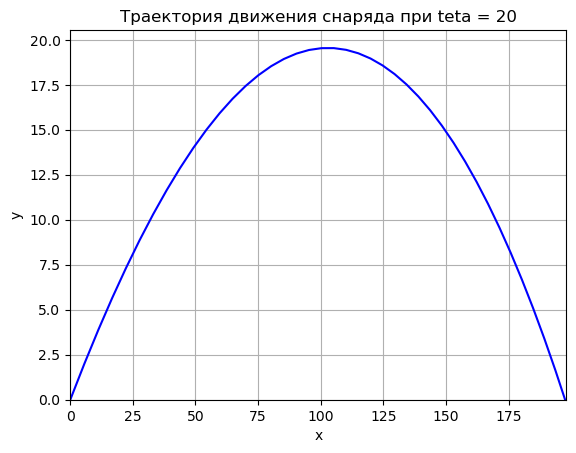

In [103]:
plt.figure()
plt.plot(y[:, 0], y[:, 1], 'b')
plt.title('Траектория движения снаряда при teta = 20')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.xlim(0, L)
plt.ylim(0, 1 + np.max(y[:, 1]))
plt.show()

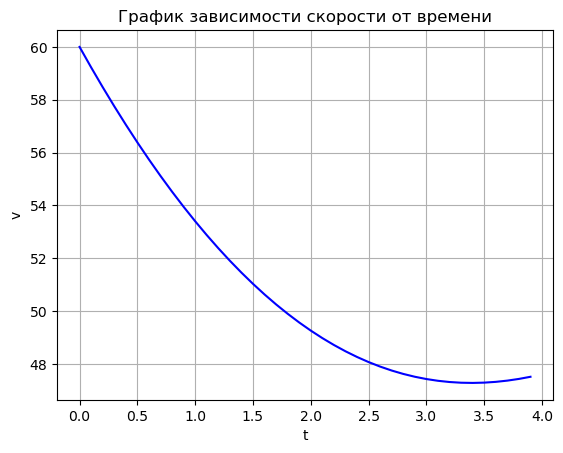

In [89]:
plt.figure()
plt.plot(t, y[:, 2] , 'b')
plt.title('График зависимости скорости от времени')
plt.xlabel('t')
plt.ylabel('v')
plt.grid(True)
plt.show()

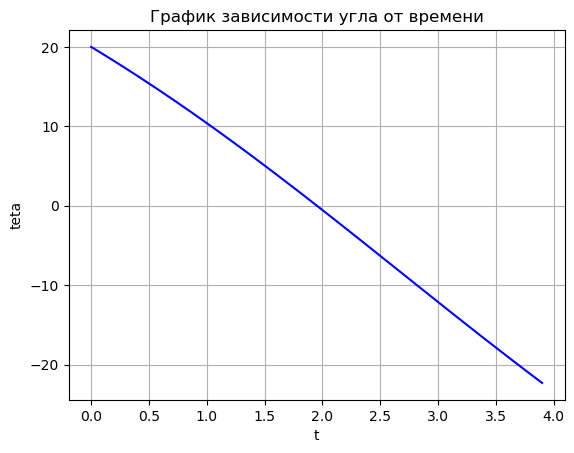

In [90]:
plt.figure()
plt.plot(t, y[:, 3] * 180 / math.pi , 'b')
plt.title('График зависимости угла от времени')
plt.xlabel('t')
plt.ylabel('teta')
plt.grid(True)
plt.show()

In [91]:
teta_values = np.arange(math.pi * 20 / 180, math.pi * 70 / 180, math.pi / 180)
max_range = 0
optimal_teta = 0
N = len(teta_values)
L_values = np.zeros(N)
for i in range(N):
    teta0 = teta_values[i]
    y0 = [0, 0, v0, teta0]
    L , t , y = rungeKutta_task(f_task, 0, 20, 0.01, y0)
    L_values[i] = L
    if (L>max_range):
        max_range = L
        optimal_teta = teta0
print('Максимальная дальность полета:', max_range)
print('достигается при угле, равном ', np.round(optimal_teta * 180 / math.pi),' градусам')

Максимальная дальность полета: 274.75283375575987
достигается при угле, равном  43.0  градусам


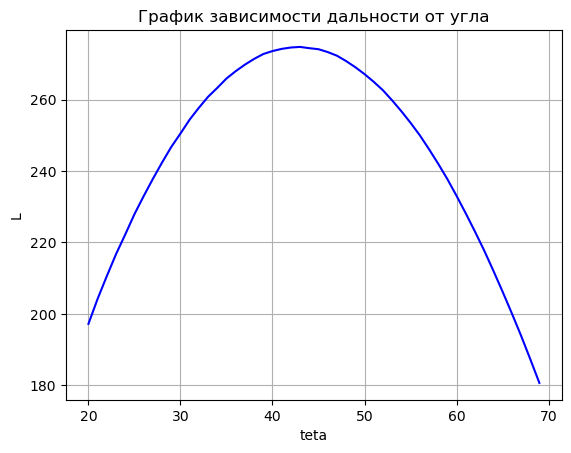

In [92]:
plt.figure()
plt.plot(teta_values*180/math.pi, L_values,  'b')
plt.title('График зависимости дальности от угла')
plt.xlabel('teta')
plt.ylabel('L')
plt.grid(True)
plt.show()